# Investigate a Dataset - Titanic Dataset Survival Study

# Introduction

This Investigate a Dataset Project is finding the Titanic Survival Study based on dataset given by udacity. 
The main Titanic dataset is available at Kaggle site.  The Sample dataset which has 891 records dataset provided by Udacity.
In this analysis, we are trying to find the answers for below questions.


1.	Which gender survived with higher count. Male or Female?
2.	Passenger travelled Alone, Family who survived more?
3.	Which Age Group are mostly survived?
4.	Which Passenger class had the most survivors?
5.	From which port boarding passengers are more survivors?

We are using the python libraries like 
Pandas for Data Analysis,
Numpy for  scientific computing , 
Maplotlib for Plotting,
and Seaborn for Visualization 
     

In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2. Loading and Understanding a Dataset

First and foremost task in analysis is 
1. Loading the dataset
2. Understand the dataset 

By understanding the dataset is helping to Data Wrangling is to clean or transform the data preparing it for analysis.

In [2]:
#Loading Data and finding the no of records with fields
titanic_data = pd.read_csv("C:/Users/netga_vvu/Udacity/titanic/titanic_data.csv")
titanic_data.shape

(891, 12)

In [3]:
# Understand the structre
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Finding complete information of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2.1. Understand Variable Descriptions

1. survival -- Survival (0 = No; 1 = Yes)
2. pclass -- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name – Name
4. sex – Sex
5. age – Age
6. sibsp -- Number of Siblings/Spouses Aboard
7. parch -- Number of Parents/Children Aboard
8. ticket -- Ticket Number
9. fare -- Passenger Fare
10. cabin -- Cabin
11. embarked -- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:

•	Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower  
•	Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
    With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. 
    The following are the definitions used for sibsp and parch.     
•	Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic   
•	Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)   
•	Parent: Mother or Father of Passenger Aboard Titanic 
•	Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. 

Some children travelled only with a nanny, therefore parch=0 for them. 

As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

# 3. Data Wrangling

After loading the data we need to do Data Wrangling before proceeding to Analysis. In Data Wrangling finding the missing data will be having more importance. The main issue is having missing data while conducting analysis, which can provide skew/bias results. 

In [5]:
# For finding the missing value we need to find information of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 3.1. Finding Missing values

In any dataset before data cleaning we need to find any missing values are there and if it is there. It is needs to substitute or it needs to be removed entirely from the dataset. Removing and substitute the data’s may impact on the study. Titanic Data set from above information, Out of 891 records Age field has only 714 records, Cabin has 204 records and Embarked has 889 Records. 

In this I will dropped Cabin information entirely since it has only  204 records. I will substitue 2 records for embarked that missing. Age field is missing for (891-714) 177 records. I would substitute these fields also.


# 3.2. Substitute missing age values with mean of age based on Pclass

In this dataset out of 891 records only 714 records only having age.  Here I can remove the records which does not having ‘Age’ or otherwise I can substitute with mean age based on Passenger Class(Pclass). I choose substitute method since I am having 891 records. Kind of small dataset. If I removed Age=NaN then my dataset will reduced to 714 records which I feel it will make my dataset as further small dataset.

In [6]:
'''
Out of 891 rows only 714 rows has only age. If age is crucial factor in taitanic 
#survival, we can substitute mean age instead of missing age. Finding mean age 
based on 'Sex' and 'Pclass" then substitute that age wherever NaN is there.
'''
mean_ages_titanic_data = titanic_data.groupby(['Sex','Pclass'])['Age'].mean()
mean_ages_titanic_data

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [7]:
'''
Function to replace the Age based on Sex and Pclass 
(mean_ages_titanic_data - Datafrme)with whereever age is null.
'''
def age_NaN(row):
    if pd.isnull(row['Age']):
        return mean_ages_titanic_data[row['Sex'],row['Pclass']]
    else:
        return row['Age']
titanic_data['Age'] =titanic_data.apply(age_NaN, axis=1)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 3.3.	Substitute Missing Embarked Station values 

Embarked Ports – The boarding ports values also missing for two records. 
First we need to find out the Embarked=NaN records then it needs to be substitute.

In [8]:
# Finding Mode of Embarked 
titanic_data['Embarked'].mode()

0    S
dtype: object

In [9]:
#Boarding Ports - two records aremissing.
missing_embarked = titanic_data[titanic_data['Embarked'].isnull()] 
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# Replacing Embarked=NaN with mode value
titanic_data['Embarked'].fillna('S', inplace = True)

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 3.4. Categorizing Passanger travelled Alone or With Family/Companion

Passanger travel status like 'Alone' or with family/companion will be analysing here. So, We need to add new column 'AloneOrFamily'. Sibsp and  Parch - both are denotes number sublinks or companions travelled. 

In [12]:
# Either Sibsp or Parch is not equal to zero denotes they travelled as Family or With Companion
titanic_data['AloneOrFamily'] =  titanic_data.Parch + titanic_data.SibSp
titanic_data['AloneOrFamily'].head()

0    1
1    1
2    0
3    1
4    0
Name: AloneOrFamily, dtype: int64

In [13]:
# If Sibsp and Parch greater than 0 then they travelled with family/companion
# if Sipsp and Parch equal to zero then they travelled 'Alone'
titanic_data['AloneOrFamily'].loc[titanic_data['AloneOrFamily'] >0] = 'With Family'
titanic_data['AloneOrFamily'].loc[titanic_data['AloneOrFamily'] == 0] = 'Alone'

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
#AloneOrFamily column added.
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AloneOrFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Alone
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,With Family


# 3.5. Dropping Non-Important columns

In Data wrangling process Dropping unimportant columns also important. In Titanic dataset Cabin has only 204 records, so that column needs to be dropped. Other columns like Name, Ticket number are does not giving any meaning in analysis. So, Cabin, Name and Ticket all three colums are dropped.

In [15]:
# Dropping columns Cabin, Name and Ticket
titanic_data = titanic_data.drop(['Cabin','Name','Ticket'], axis=1)

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
AloneOrFamily    891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


# 3.6. Modifying column names for better reading

In Data Wrangling we need to modify the column names data for better reading. 

Example in this survived is donating as 1 or o where 1 is survived and 0 is for died person. Instead of If we modify this as "Survived" and "Died" it will be giving better readability.

The Passenger Class also mentioned "First Class", "Middle class" and "Third Class" instead of 1,2,3. It will give more readability. 

Passanger boarding ports mentioned in existing Dataset as S/Q/C. It should be modified as C = Cherbourg; Q = Queenstown; S = Southampton. 

In [17]:
# Modifying column names for better reading 
# survived 1=Survived 0=Dead
# pclass 1=Upper Class, 2=Middle class, 3=Lower Class
# Embarked S=Southampton, Q=Queenstown, C=Cherbourg

def new_values_for_columns(data):
    #Survived Column name Mapping
    survived_dictionary = {0: 'Dead', 1: 'Survived'}
    data['Survived'] = data['Survived'].map(survived_dictionary)
    
    #PClass Column name Mapping
    pclass_dictionary = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    data['Pclass'] = data['Pclass'].map(pclass_dictionary)
    
    #Boarding port - Embarked COlumn name mapping
    embark_dictionary = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
    data['Embarked'] = data['Embarked'].map(embark_dictionary)
    
    return data

titanic_data = new_values_for_columns(titanic_data)

In [18]:
titanic_data.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AloneOrFamily
0,1,Dead,Lower Class,male,22.000000,1,0,7.2500,Southampton,With Family
1,2,Survived,Upper Class,female,38.000000,1,0,71.2833,Cherbourg,With Family
2,3,Survived,Lower Class,female,26.000000,0,0,7.9250,Southampton,Alone
3,4,Survived,Upper Class,female,35.000000,1,0,53.1000,Southampton,With Family
4,5,Dead,Lower Class,male,35.000000,0,0,8.0500,Southampton,Alone
5,6,Dead,Lower Class,male,26.507589,0,0,8.4583,Queenstown,Alone
6,7,Dead,Upper Class,male,54.000000,0,0,51.8625,Southampton,Alone
7,8,Dead,Lower Class,male,2.000000,3,1,21.0750,Southampton,With Family
8,9,Survived,Lower Class,female,27.000000,0,2,11.1333,Southampton,With Family
9,10,Survived,Middle Class,female,14.000000,1,0,30.0708,Cherbourg,With Family


# 4. Data Exploration

lets explore the dataset to find the answers for the below questions.

    1.Which gender survived with higher count. Male or Female?
    2.Passenger travelled Alone, Family who survived more?
    3.Which Age Group are mostly survived?
    4.Which Passenger class had the most survivors?
    5.From which port boarding passengers are more survivors?

# 4.1. Which gender survived with higher count. Male or Female?

To finding which gender survived with Higher Count, We need to first find How many Male and Female were travelled
Also lets plot them.

In [19]:
# Finding How Many male, female were travelled
print titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64


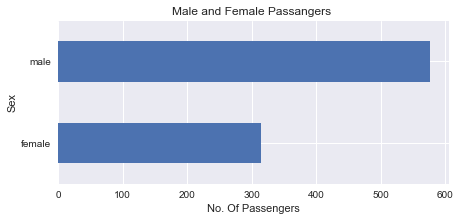

In [20]:
# Plotting How Many male, female were travelled
gender = titanic_data.groupby('Sex')
maleorfemale = gender.size()
gender_plot = maleorfemale.plot(kind='barh', title="Male and Female Passangers ", figsize=(7, 3))
gender_plot.set_xlabel("No. Of Passengers")

In [21]:
# Finding the Survivability based on Gender
pd.crosstab([titanic_data['Survived']], titanic_data['Sex'])

Sex,female,male
Survived,,
Dead,81,468
Survived,233,109


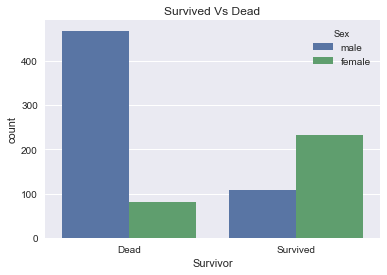

In [22]:
#Plotting surviability based on Gender
import seaborn as sns
sns.countplot(data=titanic_data, x='Survived', hue='Sex')
sns.plt.title('Survived Vs Dead')
sns.plt.xlabel('Survivor')


# 4.2. Passenger travelled Alone, Family who survived more?

Titanic Passangers travelled Alone and with family. This Alone or Family status we can get from sibsp and parch Columns. 
So, here is the analysis of Passenger travelled Alone, Family who survived more.

In [23]:
# Finding number of persons who travelled Alone, With Family/Companion
print titanic_data["AloneOrFamily"].value_counts()

Alone          537
With Family    354
Name: AloneOrFamily, dtype: int64


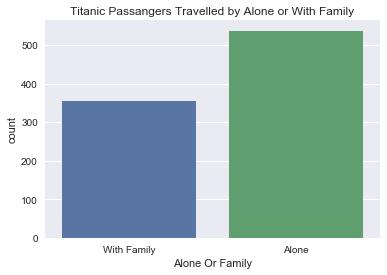

In [24]:
# Plotting ALone or With Family travelled 
sns.countplot(data=titanic_data,x='AloneOrFamily')
sns.plt.title('Titanic Passangers Travelled by Alone or With Family')
sns.plt.xlabel('Alone Or Family')

In [25]:
# Finding the Survivability based on person travelled by Alone or WithFamily
pd.crosstab([titanic_data['Survived']], titanic_data['AloneOrFamily'])

AloneOrFamily,Alone,With Family
Survived,,
Dead,374,175
Survived,163,179


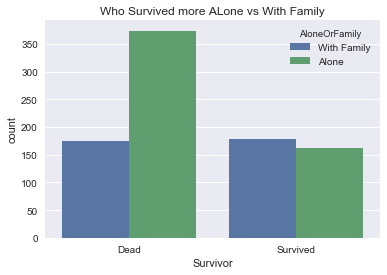

In [26]:
#Plotting surviability based on passengers travelled Alone or With Family
import seaborn as sns
sns.countplot(data=titanic_data, x='Survived', hue='AloneOrFamily')
sns.plt.title('Who Survived more ALone vs With Family')
sns.plt.xlabel('Survivor')

# 4.3.	Which Age Group are mostly survived?

In [27]:
# Passangers Age Group 
print titanic_data["Age"].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64


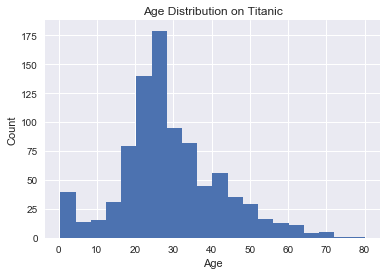

In [28]:
titanic_data['Age'].hist(bins=20)
plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')

 [<matplotlib.text.Text at 0xd4f3198>, <matplotlib.text.Text at 0xd4056a0>],

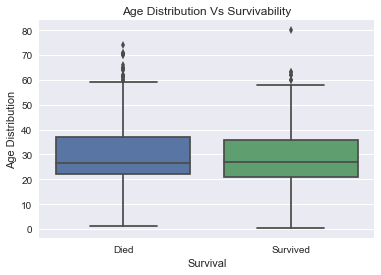

In [29]:
'''
As per Age - Plot - Out of 891 Passangers mostly belongs to 21 to 36 Age and mean age of passengers are 29.
Now plotting the Survived Vs Age in box plot.
'''
AgeVsSurvived = sns.boxplot(data=titanic_data,x='Survived', y='Age')
AgeVsSurvived.set(title='Age Distribution Vs Survivability',
                  xlabel = 'Survival',
                  ylabel = 'Age Distribution',
                  xticklabels = ['Died','Survived'])

# 4.4. Which Passenger class had the most survivors?

In Titanic three class passengers were travelled. First Class, Middle Class and Lower Class. First class usually offer higher ticket amount and economically higher status passengers were travelled. 

In [30]:
# Finding How Many Passengers travelled by each PClass
print titanic_data["Pclass"].value_counts()
#pd.crosstab([titanic_data['Survived]], titanic_data['Pclass'])

Lower Class     491
Upper Class     216
Middle Class    184
Name: Pclass, dtype: int64


In [31]:
# Passenger Class Vs Survivibility 
pd.crosstab([titanic_data['Survived']], titanic_data['Pclass'])

Pclass,Lower Class,Middle Class,Upper Class
Survived,,,
Dead,372,97,80
Survived,119,87,136


In [32]:
'''
Now plotting the survivibilty against Passenger Class. For that it needs to be convert Survived column back to Boolean
to generate factor plot. So, here we are creating a new column called 'Survived_Num'. In this Survived_num--> 0 donates Dead
1 denotes Survived
'''
titanic_data['Survived_num'] = titanic_data['Survived'].map({'Dead': 0, 'Survived': 1})
titanic_data.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AloneOrFamily,Survived_num
0,1,Dead,Lower Class,male,22.000000,1,0,7.2500,Southampton,With Family,0
1,2,Survived,Upper Class,female,38.000000,1,0,71.2833,Cherbourg,With Family,1
2,3,Survived,Lower Class,female,26.000000,0,0,7.9250,Southampton,Alone,1
3,4,Survived,Upper Class,female,35.000000,1,0,53.1000,Southampton,With Family,1
4,5,Dead,Lower Class,male,35.000000,0,0,8.0500,Southampton,Alone,0
5,6,Dead,Lower Class,male,26.507589,0,0,8.4583,Queenstown,Alone,0
6,7,Dead,Upper Class,male,54.000000,0,0,51.8625,Southampton,Alone,0
7,8,Dead,Lower Class,male,2.000000,3,1,21.0750,Southampton,With Family,0
8,9,Survived,Lower Class,female,27.000000,0,2,11.1333,Southampton,With Family,1
9,10,Survived,Middle Class,female,14.000000,1,0,30.0708,Cherbourg,With Family,1


In [33]:
#Upper Class paid higher Fare and finding corelation between Passenger Class and Ticket Fare
titanic_data.corr()

,PassengerId,Age,SibSp,Parch,Fare,Survived_num
PassengerId,1.000000,0.039636,-0.057527,-0.001652,0.012658,-0.005007
Age,0.039636,1.000000,-0.251313,-0.180705,0.118308,-0.067485
SibSp,-0.057527,-0.251313,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,-0.180705,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,0.118308,0.159651,0.216225,1.000000,0.257307
Survived_num,-0.005007,-0.067485,-0.035322,0.081629,0.257307,1.000000


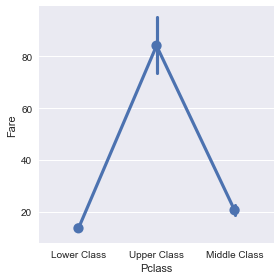

In [34]:
sns.factorplot(data=titanic_data, x='Pclass', y='Fare')
plt.show()

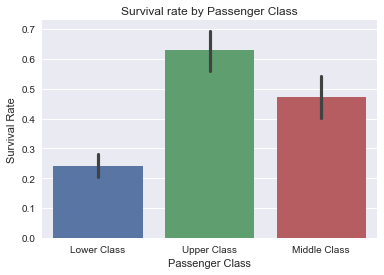

In [35]:
# Now here plotting the Passenger Class Vs Survived Data
sns.barplot('Pclass','Survived_num',data=titanic_data)
sns.plt.title('Survival rate by Passenger Class')
sns.plt.xlabel('Passenger Class')
sns.plt.ylabel('Survival Rate')

# 4.5. From which port boarding passengers are more survivors?

In Titanic from wiki the journey was started from Southampton port then it embarked from Cherbourg and Queentown. So, here we are analysing from which port boarding passengers are more survivors.


In [36]:
# Finding How Many Passengers Embarked from Boarding Ports
print titanic_data["Embarked"].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64


In [37]:
# Boarding Port Vs Survivibility 
pd.crosstab([titanic_data['Survived']], titanic_data['Embarked'])

Embarked,Cherbourg,Queenstown,Southampton
Survived,,,
Dead,75,47,427
Survived,93,30,219


In [38]:
# Comparison between Passengers boarded from Vs Passenger Class
pd.crosstab([titanic_data['Pclass']], titanic_data['Embarked'])

Embarked,Cherbourg,Queenstown,Southampton
Pclass,,,
Lower Class,66,72,353
Middle Class,17,3,164
Upper Class,85,2,129


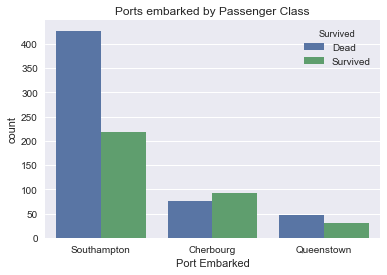

In [39]:
# Plotting Embarked - Boarding Port Vs Survivibility
sns.countplot(data=titanic_data,x='Embarked',hue='Survived')
sns.plt.title('Ports embarked by Passenger Class')
sns.plt.xlabel('Port Embarked')

# 4. Conclusion

###### Based on Analysis, Chart and Visualizations and Finding the answers for following questions.

1. Which gender survived with higher count. Male or Female?
2. Passenger travelled Alone, Family who survived more?
3. Which Age Group are mostly survived?
4. Which Passenger class had the most survivors?
5. From which port boarding passengers are more survivors?

We can conclude the following points.
######  1. Female are  giving more preference in life boats. So, female survival rate is higher than male. 
######  2. Passenger travelled with family or companion has more surivibility. Titanic sank happened 1912, that time it follows Ladies and Children First concept. When considering and giving preference for this policy most of the female who accompany with companion (family members) are giving preference in lifeboat.
######  3. Mean age group of 21 to 36 has more passengers. Most of the survivors are belongs to this age group. Age group is not a significance factor alone. Other factors like Gender, Travelled Alone or With Family, Passenger Class, Embarked - Boarding port are having more significance.
######  4. Upper Class traveller paid more ticket fare and it able to do by Rich people. Only RIch people can travell in Upper class and this Upper class people giving preference in all luxury and also they are prefered for life boats during titanic sank.
######  5. Passengers who boarded from Southampton has more lower class passengers and they were given least preference. 72.50% passengers boarded from Southampton and out of this who were in middle class and upper class had more suvivors.


##### Limitations

###### 1. Out of 891 records 714 records are had Age. The Age missing records updated by 'Age' that derived mean age based on passenger class. This may deviate the accuracy. 
###### 2. We entirely dropped Cabin where it may affect the survivibility. 
###### 3. Acutal Titanic data passengers 2224. However we took for this analysis only 891. If we have complete  data and analyse it may give different insights than this analysis. 


# 5. References 